В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [3]:
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [4]:
#1
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [5]:
X = np.array(non_smoker_df['age'])
y = np.array(non_smoker_df['charges'])
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

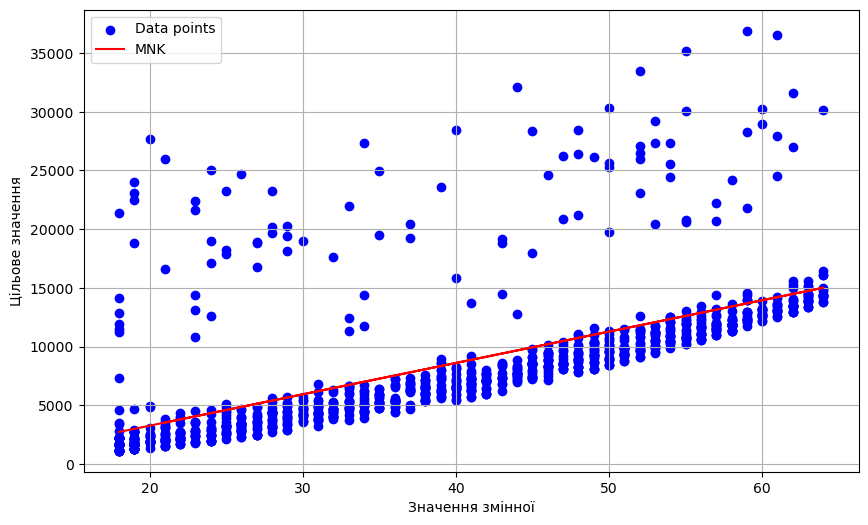

In [6]:
np.dot(X_with_intercept[0], MNK_coefs)
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

plt.figure(figsize=(10, 6))
plt.scatter(X[:], y, color='blue', label='Data points')
plt.plot(X[:], predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
rmse(y, predictions_MNK)

4662.505766636395

In [29]:
#2
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 250.0, -2000.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

In [30]:
X = non_smoker_df['age']
y = non_smoker_df['charges']

m, b, errors = full_batch_gradient_descent(X, y, lr=0.01, epochs=1000)
predictions_fbgd = m * X[:] + b
m, b

/tmp/ipykernel_542891/2410860265.py:13: RuntimeWarning: invalid value encountered in scalar subtract
  m = m - lr * m_gradient


(nan, inf)

In [31]:
X = non_smoker_df['age']
y = non_smoker_df['charges']
X = X.to_frame()
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), -2091.4205565650827)

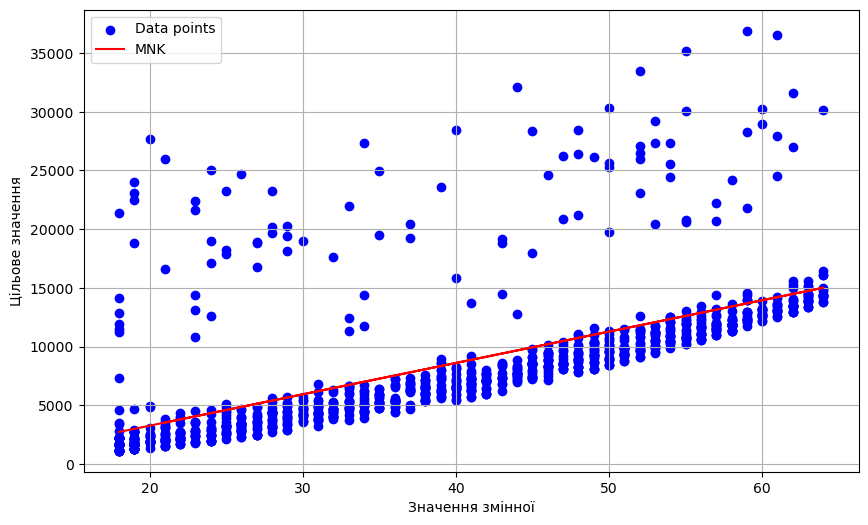

In [32]:
predictions_sklearn = lin_reg.predict(X)
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X[:], y, color='blue', label='Data points')
plt.plot(X[:], predictions_sklearn, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
rmse(y, predictions_sklearn)

4662.505766636395

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [40]:
X = medical_df['age']
y = medical_df['charges']
X = X.to_frame()
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.coef_, lin_reg.intercept_

(array([257.72261867]), 3165.885006063021)

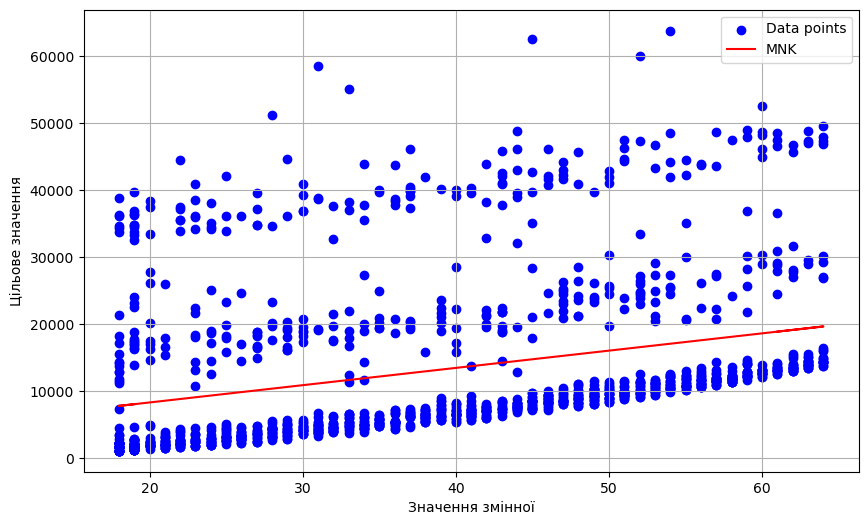

In [41]:
predictions_sklearn = lin_reg.predict(X)
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X[:], y, color='blue', label='Data points')
plt.plot(X[:], predictions_sklearn, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
rmse(y, predictions_sklearn)

4662.505766636395

Модель погана, бо візуально видно, що дані розстащовуються вздовж трьох прямих, а модель дає тільки одну. З бізнесової точки зору ми отримаємо що для багатьох договорів (нижнє скупчення) ми зависимо ціни і користувачі підуть від нас, а це велика основна частина договорів.